# Cours GTI770 (Eté 2018)
#### Etudiant : ILLY Poulmanogo

## Travaux Pratiques:  Rapport TP00
### Exercice 1 
1. Implémentation la fonction f(x) = x

In [21]:
from numpy import arange
def identite(x):
    return x

2. Afficher la fonction f entre -6 et + 6

[-6 -5 -4 -3 -2 -1  0  1  2  3  4  5]


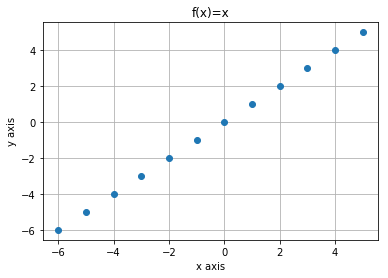

In [20]:
import matplotlib.pyplot as plt
x = arange (-6,6)
y = identite(x)
plt.plot(x,y,'o')
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("f(x)=x")
plt.grid(True)
plt.show()

3. Implémentation la fonction sigmoid (https://en.wikipedia.org/wiki/Sigmoid_function)

In [22]:
import numpy as np
def sigmoid(x):
    y = np.exp(x)/(np.exp(x)+1)
    return y

4. Affichage la fonction f entre -6 et + 6

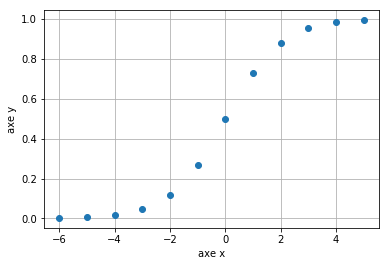

In [24]:
x = arange(-6,6)
y = sigmoid(x)
plt.plot(x,y,'o')
plt.xlabel("axe x")
plt.ylabel("axe y")
plt.grid(True)
plt.show()

### Exercice 2